## 1.Load Dataset and Display Basic Info

In [ ]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split


# Show all columns when printing a DataFrame
pd.set_option('display.max_columns', None)
pd.set_option('display.expand_frame_repr', False)

df = pd.read_csv(r"C:\Users\grace\Downloads\House_Pricing.csv")
print(df.head())


           ID Date House was Sold  Sale Price  No of Bedrooms  No of Bathrooms  Flat Area (in Sqft)  Lot Area (in Sqft)  No of Floors Waterfront View No of Times Visited Condition of the House  Overall Grade  Area of the House from Basement (in Sqft)  Basement Area (in Sqft)  Age of House (in Years)  Renovated Year  Zipcode  Latitude  Longitude  Living Area after Renovation (in Sqft)  Lot Area after Renovation (in Sqft)
0  7129300520     14 October 2017    221900.0               3             1.00               1180.0              5650.0           1.0              No                 NaN                   Fair              7                                     1180.0                        0                       63               0  98178.0   47.5112   -122.257                                  1340.0                                 5650
1  6414100192    14 December 2017    538000.0               3             2.25               2570.0              7242.0           2.0              No   

In [ ]:
df.shape


(21613, 21)

In [ ]:
df.dtypes

ID                                             int64
Date House was Sold                           object
Sale Price                                   float64
No of Bedrooms                                 int64
No of Bathrooms                              float64
Flat Area (in Sqft)                          float64
Lot Area (in Sqft)                           float64
No of Floors                                 float64
Waterfront View                               object
No of Times Visited                           object
Condition of the House                        object
Overall Grade                                  int64
Area of the House from Basement (in Sqft)    float64
Basement Area (in Sqft)                        int64
Age of House (in Years)                        int64
Renovated Year                                 int64
Zipcode                                      float64
Latitude                                     float64
Longitude                                    f

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   ID                                         21613 non-null  int64  
 1   Date House was Sold                        21613 non-null  object 
 2   Sale Price                                 21609 non-null  float64
 3   No of Bedrooms                             21613 non-null  int64  
 4   No of Bathrooms                            21609 non-null  float64
 5   Flat Area (in Sqft)                        21604 non-null  float64
 6   Lot Area (in Sqft)                         21604 non-null  float64
 7   No of Floors                               21613 non-null  float64
 8   Waterfront View                            21613 non-null  object 
 9   No of Times Visited                        2124 non-null   object 
 10  Condition of the House

In [ ]:
df.describe()

,ID,Sale Price,No of Bedrooms,No of Bathrooms,Flat Area (in Sqft),Lot Area (in Sqft),No of Floors,Overall Grade,Area of the House from Basement (in Sqft),Basement Area (in Sqft),Age of House (in Years),Renovated Year,Zipcode,Latitude,Longitude,Living Area after Renovation (in Sqft),Lot Area after Renovation (in Sqft)
count,2.161300e+04,2.160900e+04,21613.000000,21609.000000,21604.000000,2.160400e+04,21613.000000,21613.000000,21610.000000,21613.000000,21613.000000,21613.000000,21612.000000,21612.000000,21612.000000,21612.000000,21613.000000
mean,4.580302e+09,5.401984e+05,3.370842,2.114732,2079.931772,1.510776e+04,1.494309,7.623467,1788.344193,291.509045,46.994864,84.402258,98077.937766,47.560048,-122.213892,1986.538914,12768.455652
std,2.876566e+09,3.673890e+05,0.930062,0.770138,918.487597,4.142827e+04,0.539989,1.105439,827.982604,442.575043,29.373411,401.679240,53.505425,0.138565,0.140830,685.404255,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,1.000000,290.000000,0.000000,3.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1429.250000,5.040000e+03,1.000000,7.000000,1190.000000,0.000000,21.000000,0.000000,98033.000000,47.470975,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.617500e+03,1.500000,7.000000,1560.000000,0.000000,43.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068825e+04,2.000000,8.000000,2210.000000,560.000000,67.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,10.000000,9410.000000,4820.000000,118.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


## 2. Remove Duplicates

In [ ]:
duplicated_rows = df.duplicated()
duplicated_rows.sum()


np.int64(0)

In [ ]:
df.columns.duplicated()

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False])

In [ ]:
# Step 1: Transpose and find duplicate columns by value
duplicate_columns = df.T.duplicated()

# Step 2: Drop duplicate columns
df = df.loc[:, ~duplicate_columns]
print(df.columns[duplicate_columns])


Index([], dtype='object')


## 3.Handling Missing Values

In [ ]:
# Count missing values in each column
missing_counts = df.isnull().sum()
missing_counts = missing_counts[missing_counts > 0]  # Only show columns with missing data
print("Missing values in each column:\n", missing_counts)


Missing values in each column:
 Sale Price                                       4
No of Bathrooms                                  4
Flat Area (in Sqft)                              9
Lot Area (in Sqft)                               9
No of Times Visited                          19489
Area of the House from Basement (in Sqft)        3
Zipcode                                          1
Latitude                                         1
Longitude                                        1
Living Area after Renovation (in Sqft)           1
dtype: int64


In [ ]:
for column in missing_counts.index:
    if df[column].dtype in ['int64', 'float64']:
        if df[column].skew() < 1:
            df[column] = df[column].fillna(df[column].mean())
            print(f"{column}: Filled missing values with MEAN")
        else:
            df[column] = df[column].fillna(df[column].median())
            print(f"{column}: Filled missing values with MEDIAN")
    else:
        df[column] = df[column].fillna(df[column].mode()[0])
        print(f"{column}: Filled missing values with MODE")



Sale Price: Filled missing values with MEDIAN
No of Bathrooms: Filled missing values with MEAN
Flat Area (in Sqft): Filled missing values with MEDIAN
Lot Area (in Sqft): Filled missing values with MEDIAN
No of Times Visited: Filled missing values with MODE
Area of the House from Basement (in Sqft): Filled missing values with MEDIAN
Zipcode: Filled missing values with MEAN
Latitude: Filled missing values with MEAN
Longitude: Filled missing values with MEAN
Living Area after Renovation (in Sqft): Filled missing values with MEDIAN


In [ ]:
approach_summary = []

for column in missing_counts.index:
    if df[column].dtype in ['int64', 'float64']:
        method = 'mean' if df[column].skew() < 1 else 'median'
    else:
        method = 'mode'
    approach_summary.append(f"{column}: Missing values filled using {method} imputation.")

# Print the summary
print("\nApproach Summary:")
for line in approach_summary:
    print("-", line)



Approach Summary:
- Sale Price: Missing values filled using median imputation.
- No of Bathrooms: Missing values filled using mean imputation.
- Flat Area (in Sqft): Missing values filled using median imputation.
- Lot Area (in Sqft): Missing values filled using median imputation.
- No of Times Visited: Missing values filled using mode imputation.
- Area of the House from Basement (in Sqft): Missing values filled using median imputation.
- Zipcode: Missing values filled using mean imputation.
- Latitude: Missing values filled using mean imputation.
- Longitude: Missing values filled using mean imputation.
- Living Area after Renovation (in Sqft): Missing values filled using median imputation.


## 4 Scaling Numerical Variables

In [ ]:
# Exclude the target variable 'Sale Price' from scaling
numerical_columns = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
numerical_columns.remove('Sale Price')
print("Numerical columns to scale:", numerical_columns)


Numerical columns to scale: ['ID', 'No of Bedrooms', 'No of Bathrooms', 'Flat Area (in Sqft)', 'Lot Area (in Sqft)', 'No of Floors', 'Overall Grade', 'Area of the House from Basement (in Sqft)', 'Basement Area (in Sqft)', 'Age of House (in Years)', 'Renovated Year', 'Zipcode', 'Latitude', 'Longitude', 'Living Area after Renovation (in Sqft)', 'Lot Area after Renovation (in Sqft)']


In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df[numerical_columns] = scaler.fit_transform(df[numerical_columns])

print("Standard scaling applied to numerical columns.")
print("Sample of scaled features:")
print(df[numerical_columns].head())


Standard scaling applied to numerical columns.
Sample of scaled features:
         ID  No of Bedrooms  No of Bathrooms  Flat Area (in Sqft)  Lot Area (in Sqft)  No of Floors  Overall Grade  Area of the House from Basement (in Sqft)  Basement Area (in Sqft)  Age of House (in Years)  Renovated Year   Zipcode  Latitude  Longitude  Living Area after Renovation (in Sqft)  Lot Area after Renovation (in Sqft)
0  0.886146       -0.398737        -1.447612            -0.979940           -0.228268     -0.915427      -0.564013                                  -0.734756                -0.658681                 0.544898       -0.210128  1.870219 -0.352541  -0.306117                               -0.943328                            -0.260715
1  0.637511       -0.398737         0.175661             0.533757           -0.189832      0.936506      -0.564013                                   0.461025                 0.245141                 0.681079        4.746678  0.879619  1.161620  -0.746386        

## 5 Encoding Categorical Variables

In [ ]:

df = pd.read_csv(r"C:\Users\grace\Downloads\House_Pricing.csv")
print(df.head())

           ID Date House was Sold  Sale Price  No of Bedrooms  No of Bathrooms  Flat Area (in Sqft)  Lot Area (in Sqft)  No of Floors Waterfront View No of Times Visited Condition of the House  Overall Grade  Area of the House from Basement (in Sqft)  Basement Area (in Sqft)  Age of House (in Years)  Renovated Year  Zipcode  Latitude  Longitude  Living Area after Renovation (in Sqft)  Lot Area after Renovation (in Sqft)
0  7129300520     14 October 2017    221900.0               3             1.00               1180.0              5650.0           1.0              No                 NaN                   Fair              7                                     1180.0                        0                       63               0  98178.0   47.5112   -122.257                                  1340.0                                 5650
1  6414100192    14 December 2017    538000.0               3             2.25               2570.0              7242.0           2.0              No   

In [ ]:

df['Date House was Sold'].unique()



array(['14 October 2017', '14 December 2017', '15 February 2016',
       '14 May 2017', '14 June 2017', '15 January 2016', '15 April 2016',
       '15 March 2016', '14 July 2017', '14 August 2017',
       '14 November 2017', '14 September 2017', '15 May 2016'],
      dtype=object)

In [ ]:
print(df.columns)


Index(['ID', 'Date House was Sold', 'Sale Price', 'No of Bedrooms',
       'No of Bathrooms', 'Flat Area (in Sqft)', 'Lot Area (in Sqft)',
       'No of Floors', 'Waterfront View', 'No of Times Visited',
       'Condition of the House', 'Overall Grade',
       'Area of the House from Basement (in Sqft)', 'Basement Area (in Sqft)',
       'Age of House (in Years)', 'Renovated Year', 'Zipcode', 'Latitude',
       'Longitude', 'Living Area after Renovation (in Sqft)',
       'Lot Area after Renovation (in Sqft)'],
      dtype='object')


In [ ]:
# Only include categorical columns that still exist in df
categorical_columns = ['Date House was Sold', 'Waterfront View', 'No of Times Visited', 'Condition of the House']
existing_categorical_columns = [col for col in categorical_columns if col in df.columns]

# Only apply get_dummies if any of those original columns exist
if existing_categorical_columns:
    df = pd.get_dummies(df, columns=existing_categorical_columns, drop_first=True)

# Show updated DataFrame
print(df.head())


           ID  Sale Price  No of Bedrooms  No of Bathrooms  Flat Area (in Sqft)  Lot Area (in Sqft)  No of Floors  Overall Grade  Area of the House from Basement (in Sqft)  Basement Area (in Sqft)  Age of House (in Years)  Renovated Year  Zipcode  Latitude  Longitude  Living Area after Renovation (in Sqft)  Lot Area after Renovation (in Sqft)  Date House was Sold_14 December 2017  Date House was Sold_14 July 2017  Date House was Sold_14 June 2017  Date House was Sold_14 May 2017  Date House was Sold_14 November 2017  Date House was Sold_14 October 2017  Date House was Sold_14 September 2017  Date House was Sold_15 April 2016  Date House was Sold_15 February 2016  Date House was Sold_15 January 2016  Date House was Sold_15 March 2016  Date House was Sold_15 May 2016  Waterfront View_Yes  No of Times Visited_Once  No of Times Visited_Thrice  No of Times Visited_Twice  Condition of the House_Excellent  Condition of the House_Fair  Condition of the House_Good  Condition of the House_Okay
0

In [ ]:

from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()

df = pd.read_csv(r"C:\Users\grace\Downloads\House_Pricing.csv")
print(df.head())
encoded_data = df.copy()

categorical_columns = df.select_dtypes(include=['object']).columns

ordinal_columns = ['Condition of the House']
nominal_columns = [col for col in categorical_columns if col not in ordinal_columns]

for col in ordinal_columns:
    encoded_data[col] = label_encoder.fit_transform(encoded_data[col])
    print(f"Applied Label Encoding to: {col}")

encoded_data = pd.get_dummies(encoded_data, columns=nominal_columns, drop_first=True)
print("\nApplied One-Hot Encoding to nominal categories.")

print("\nEncoded Data (first few rows):")
print(encoded_data.head())

           ID Date House was Sold  Sale Price  No of Bedrooms  No of Bathrooms  Flat Area (in Sqft)  Lot Area (in Sqft)  No of Floors Waterfront View No of Times Visited Condition of the House  Overall Grade  Area of the House from Basement (in Sqft)  Basement Area (in Sqft)  Age of House (in Years)  Renovated Year  Zipcode  Latitude  Longitude  Living Area after Renovation (in Sqft)  Lot Area after Renovation (in Sqft)
0  7129300520     14 October 2017    221900.0               3             1.00               1180.0              5650.0           1.0              No                 NaN                   Fair              7                                     1180.0                        0                       63               0  98178.0   47.5112   -122.257                                  1340.0                                 5650
1  6414100192    14 December 2017    538000.0               3             2.25               2570.0              7242.0           2.0              No   

## 6 Outlier Removal

In [ ]:
# Step 1: Identify numerical columns
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns

# Step 2: Compute Q1, Q3, IQR from the SAME df
Q1 = df[numerical_cols].quantile(0.25)
Q3 = df[numerical_cols].quantile(0.75)
IQR = Q3 - Q1

# Step 3: Build mask from the same df
mask = ~((df[numerical_cols] < (Q1 - 1.5 * IQR)) | 
         (df[numerical_cols] > (Q3 + 1.5 * IQR))).any(axis=1)

# Step 4: Align indexes (optional but safe)
df = df.reset_index(drop=True)
mask = mask.reset_index(drop=True)

# Step 5: Filter the DataFrame
df = df[mask]
df_clean = df[mask].copy()
print (df_clean)

               ID Date House was Sold  Sale Price  No of Bedrooms  No of Bathrooms  Flat Area (in Sqft)  Lot Area (in Sqft)  No of Floors Waterfront View No of Times Visited Condition of the House  Overall Grade  Area of the House from Basement (in Sqft)  Basement Area (in Sqft)  Age of House (in Years)  Renovated Year  Zipcode  Latitude  Longitude  Living Area after Renovation (in Sqft)  Lot Area after Renovation (in Sqft)
0      7129300520     14 October 2017    221900.0               3             1.00               1180.0              5650.0           1.0              No                 NaN                   Fair              7                                     1180.0                        0                       63               0  98178.0   47.5112   -122.257                                  1340.0                                 5650
1      5631500400    15 February 2016    180000.0               2             1.00                770.0             10000.0           1.0       

C:\Users\grace\AppData\Local\Temp\ipykernel_16016\2094779625.py:19: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_clean = df[mask].copy()


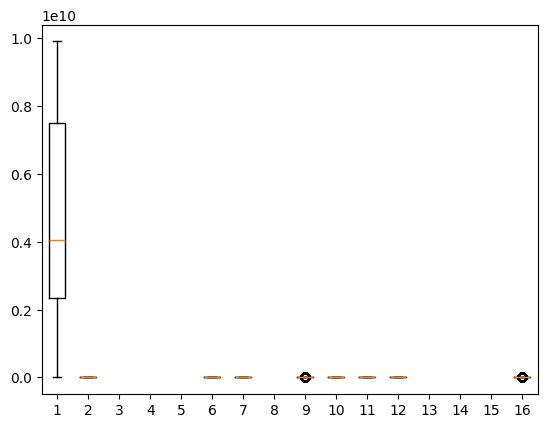

In [ ]:

import matplotlib.pyplot as plt
plt.boxplot(df[numerical_columns])
plt.show()

In [ ]:
def remove_outliers(df,column_name):
    q1 = df[column_name].quantile(0.25)
    q3 = df[column_name].quantile(0.75)
    iqr = q3-q1
    upper_bound = q3 + 1.5 * iqr
    lower_bound = q1 - 1.5 * iqr
    df[column_name] = df[column_name].clip(upper = upper_bound)
    df[column_name] = df[column_name].clip(lower = lower_bound)
    return df[column_name]

In [ ]:
num_cols = df[numerical_columns].columns.tolist()
for col in num_cols:
    df.loc[:, col] = remove_outliers(df, col)


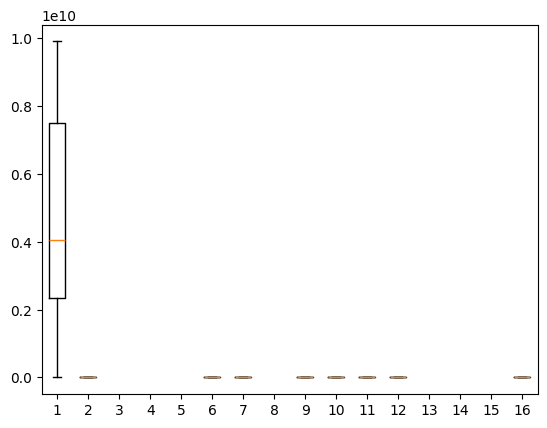

In [ ]:
plt.boxplot(df[numerical_columns])
plt.show()

## 7 Train-Test split

In [ ]:
# Encoding (e.g., one-hot encode categorical columns)
df_encoded = pd.get_dummies(df_clean, drop_first=True)

# Scaling
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

# Exclude target column before scaling
X = df_encoded.drop(columns=['Sale Price'])
X_scaled = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)

# Final encoded and scaled DataFrame
df_enc_sc = pd.concat([X_scaled, df_encoded['Sale Price'].reset_index(drop=True)], axis=1)


In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df_encoded_scaled = df_encoded.copy()

# Get numerical columns excluding target
num_cols = df_encoded_scaled.select_dtypes(include=['int64', 'float64']).columns.tolist()
num_cols.remove('Sale Price')

# Scale
df_encoded_scaled[num_cols] = scaler.fit_transform(df_encoded_scaled[num_cols])


In [ ]:
from sklearn.model_selection import train_test_split

X = df_encoded_scaled.drop(columns=['Sale Price'])
y = df_encoded_scaled['Sale Price']

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2)


In [ ]:
X_train.head()

,ID,No of Bedrooms,No of Bathrooms,Flat Area (in Sqft),Lot Area (in Sqft),No of Floors,Overall Grade,Area of the House from Basement (in Sqft),Basement Area (in Sqft),Age of House (in Years),Renovated Year,Zipcode,Latitude,Longitude,Living Area after Renovation (in Sqft),Lot Area after Renovation (in Sqft),Date House was Sold_14 December 2017,Date House was Sold_14 July 2017,Date House was Sold_14 June 2017,Date House was Sold_14 May 2017,Date House was Sold_14 November 2017,Date House was Sold_14 October 2017,Date House was Sold_14 September 2017,Date House was Sold_15 April 2016,Date House was Sold_15 February 2016,Date House was Sold_15 January 2016,Date House was Sold_15 March 2016,Date House was Sold_15 May 2016,Waterfront View_Yes,No of Times Visited_Once,No of Times Visited_Thrice,No of Times Visited_Twice,Condition of the House_Excellent,Condition of the House_Fair,Condition of the House_Good,Condition of the House_Okay
17316,-0.296193,-0.345117,0.800675,0.458393,-0.126935,0.977030,0.736256,0.884942,-0.673822,-0.612769,0.0,-0.970003,0.052644,1.786619,0.990254,0.295271,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,True,False
2017,-0.478586,-0.345117,1.958007,-0.554393,-1.828802,2.806911,0.736256,-0.614940,0.065987,-1.022484,0.0,0.378618,0.541289,-0.730315,-0.523559,-1.934762,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False
15262,-0.258428,0.943903,0.029121,1.358646,3.477055,-0.852851,0.736256,1.818203,-0.673822,0.206661,0.0,-1.487282,-1.713723,-0.367296,-1.144611,2.941834,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False
9134,-0.185088,-0.345117,-0.742434,-0.393633,0.363037,-0.852851,-0.495745,-0.831590,0.696195,0.070090,0.0,-1.450334,-1.496390,-0.568973,0.252755,0.310242,True,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,True,False,False
11983,-0.797330,0.943903,-0.356656,0.763836,0.300532,-0.852851,-0.495745,0.101671,1.134601,-0.168911,0.0,-0.434250,-0.728620,0.552353,-0.057771,0.392084,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False


In [ ]:
X_test.head()

,ID,No of Bedrooms,No of Bathrooms,Flat Area (in Sqft),Lot Area (in Sqft),No of Floors,Overall Grade,Area of the House from Basement (in Sqft),Basement Area (in Sqft),Age of House (in Years),Renovated Year,Zipcode,Latitude,Longitude,Living Area after Renovation (in Sqft),Lot Area after Renovation (in Sqft),Date House was Sold_14 December 2017,Date House was Sold_14 July 2017,Date House was Sold_14 June 2017,Date House was Sold_14 May 2017,Date House was Sold_14 November 2017,Date House was Sold_14 October 2017,Date House was Sold_14 September 2017,Date House was Sold_15 April 2016,Date House was Sold_15 February 2016,Date House was Sold_15 January 2016,Date House was Sold_15 March 2016,Date House was Sold_15 May 2016,Waterfront View_Yes,No of Times Visited_Once,No of Times Visited_Thrice,No of Times Visited_Twice,Condition of the House_Excellent,Condition of the House_Fair,Condition of the House_Good,Condition of the House_Okay
572,-1.062850,2.232923,1.572230,1.165735,-0.469678,0.062089,-0.495745,0.284990,1.518206,1.504093,0.0,0.489463,-0.065966,-0.625443,-1.435728,-0.486554,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,True,False
17179,0.232561,0.943903,0.800675,1.776621,0.992832,0.977030,1.968257,2.251502,-0.673822,-0.681055,0.0,-0.415775,-0.185997,0.665293,2.251764,1.210839,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False
14216,-0.249361,2.232923,0.414898,0.185101,0.294607,-0.852851,-0.495745,-0.731597,1.518206,0.377376,0.0,-1.357963,0.400662,0.963775,-0.077178,0.549780,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,True,False,True,False,False
21468,-0.534541,0.943903,1.572230,2.114216,-0.127823,0.977030,1.968257,2.601475,-0.673822,-1.261485,0.0,-0.471198,-0.224350,0.278072,1.669529,0.839222,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,True,False,False
4620,-0.146896,-0.345117,-0.742434,-0.650849,0.571586,-0.852851,-1.727746,-0.264967,-0.673822,0.616377,0.0,1.560970,-0.593675,-0.931992,-0.504151,1.070443,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False


In [ ]:
y_test

572      442000.0
17179    752000.0
14216    525126.0
21468    649500.0
4620     270000.0
           ...   
11043    751000.0
8759     411500.0
12448    320000.0
16676    590000.0
19371    224000.0
Name: Sale Price, Length: 3180, dtype: float64

In [ ]:
y_train

17316    578550.0
2017     580000.0
15262    360000.0
9134     284850.0
11983    319950.0
           ...   
6577     908800.0
16920    420000.0
6917     546000.0
6888     424950.0
12717    313100.0
Name: Sale Price, Length: 12720, dtype: float64

In [ ]:
print("Training Features Shape:", X_train.shape)
print("Testing Features Shape:", X_test.shape)
print("Training Target Shape:", y_train.shape)
print("Testing Target Shape:", y_test.shape)

Training Features Shape: (12720, 36)
Testing Features Shape: (3180, 36)
Training Target Shape: (12720,)
Testing Target Shape: (3180,)
